In [9]:
from google.colab import files

uploaded = files.upload()

Saving ad_viz_plotval_data (3).csv to ad_viz_plotval_data (3).csv
Saving ad_viz_plotval_data.csv to ad_viz_plotval_data (4).csv


Unión de las Data Set del año 2022 y 2023 de PM 2.5 en california

In [16]:
import pandas as pd

# Lee los archivos que subiste y asígnalos a variables
df_2022 = pd.read_csv("ad_viz_plotval_data.csv")
df_2023 = pd.read_csv("ad_viz_plotval_data (1).csv")

# Ahora sí puedes concatenarlos
df_combinado = pd.concat([df_2022, df_2023], ignore_index=True)

# Verifica el resultado
print(df_combinado.shape)
df_combinado.head()

(60275, 22)


,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,Method Code,Method Description,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
0,01/01/2022,AQS,60010007,3,12.7,ug/m3 LC,58,Livermore,1,100.0,...,170.0,Met One BAM-1020 Mass Monitor w/VSCC,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
1,01/02/2022,AQS,60010007,3,13.9,ug/m3 LC,60,Livermore,1,100.0,...,170.0,Met One BAM-1020 Mass Monitor w/VSCC,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
2,01/03/2022,AQS,60010007,3,7.1,ug/m3 LC,39,Livermore,1,100.0,...,170.0,Met One BAM-1020 Mass Monitor w/VSCC,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
3,01/04/2022,AQS,60010007,3,3.7,ug/m3 LC,21,Livermore,1,100.0,...,170.0,Met One BAM-1020 Mass Monitor w/VSCC,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
4,01/05/2022,AQS,60010007,3,4.2,ug/m3 LC,23,Livermore,1,100.0,...,170.0,Met One BAM-1020 Mass Monitor w/VSCC,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217


In [44]:
print(df_combinado.columns)   # para ver los nombres exactos de las columnas


Index(['Date', 'Source', 'Site ID', 'POC', 'Daily Mean PM2.5 Concentration',
       'Units', 'Daily AQI Value', 'Local Site Name', 'Daily Obs Count',
       'Percent Complete', 'AQS Parameter Code', 'AQS Parameter Description',
       'Method Code', 'Method Description', 'CBSA Code', 'CBSA Name',
       'State FIPS Code', 'State', 'County FIPS Code', 'County',
       'Site Latitude', 'Site Longitude', 'año', 'mes_num', 'mes'],
      dtype='object')


Conjunto de datos

In [52]:
import pandas as pd

# Convertir Date
df_combinado["Date"] = pd.to_datetime(df_combinado["Date"], errors="coerce")

# Extraer año y mes como número
df_combinado["año"] = df_combinado["Date"].dt.year
df_combinado["mes"] = df_combinado["Date"].dt.month

# Detectar automáticamente la columna de concentración
col_concentracion = [col for col in df_combinado.columns if col.startswith("Daily")][0]

# Promedio mensual por año y mes
df_grouped = df_combinado.groupby(["año", "mes"])[col_concentracion].mean().reset_index()

# Crear columnas dummies para año y mes
df_years = pd.get_dummies(df_grouped["año"], prefix="año")
df_months = pd.get_dummies(df_grouped["mes"], prefix="mes")

# Unir todo
df_final = pd.concat([df_grouped[[col_concentracion]], df_years, df_months], axis=1)

print(df_final.head())
print("Número de columnas:", df_final.shape[1])

   Daily Mean PM2.5 Concentration  año_2022  año_2024  mes_1  mes_2  mes_3  \
0                       11.473370      True     False   True  False  False   
1                        8.548420      True     False  False   True  False   
2                        6.626541      True     False  False  False   True   
3                        7.528748      True     False  False  False  False   
4                        7.349534      True     False  False  False  False   

   mes_4  mes_5  mes_6  mes_7  mes_8  mes_9  mes_10  mes_11  mes_12  
0  False  False  False  False  False  False   False   False   False  
1  False  False  False  False  False  False   False   False   False  
2  False  False  False  False  False  False   False   False   False  
3   True  False  False  False  False  False   False   False   False  
4  False   True  False  False  False  False   False   False   False  
Número de columnas: 15


Resumen Estadistico

In [31]:
df_combinado.head()

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,Method Code,Method Description,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
0,01/01/2022,AQS,60010007,3,12.7,ug/m3 LC,58,Livermore,1,100.0,...,170.0,Met One BAM-1020 Mass Monitor w/VSCC,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
1,01/02/2022,AQS,60010007,3,13.9,ug/m3 LC,60,Livermore,1,100.0,...,170.0,Met One BAM-1020 Mass Monitor w/VSCC,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
2,01/03/2022,AQS,60010007,3,7.1,ug/m3 LC,39,Livermore,1,100.0,...,170.0,Met One BAM-1020 Mass Monitor w/VSCC,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
3,01/04/2022,AQS,60010007,3,3.7,ug/m3 LC,21,Livermore,1,100.0,...,170.0,Met One BAM-1020 Mass Monitor w/VSCC,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
4,01/05/2022,AQS,60010007,3,4.2,ug/m3 LC,23,Livermore,1,100.0,...,170.0,Met One BAM-1020 Mass Monitor w/VSCC,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217


Nombres de las columnas

In [20]:
df_combinado.columns

Index(['Date', 'Source', 'Site ID', 'POC', 'Daily Mean PM2.5 Concentration',
       'Units', 'Daily AQI Value', 'Local Site Name', 'Daily Obs Count',
       'Percent Complete', 'AQS Parameter Code', 'AQS Parameter Description',
       'Method Code', 'Method Description', 'CBSA Code', 'CBSA Name',
       'State FIPS Code', 'State', 'County FIPS Code', 'County',
       'Site Latitude', 'Site Longitude'],
      dtype='object')

Visualización básica del conjunto de datos

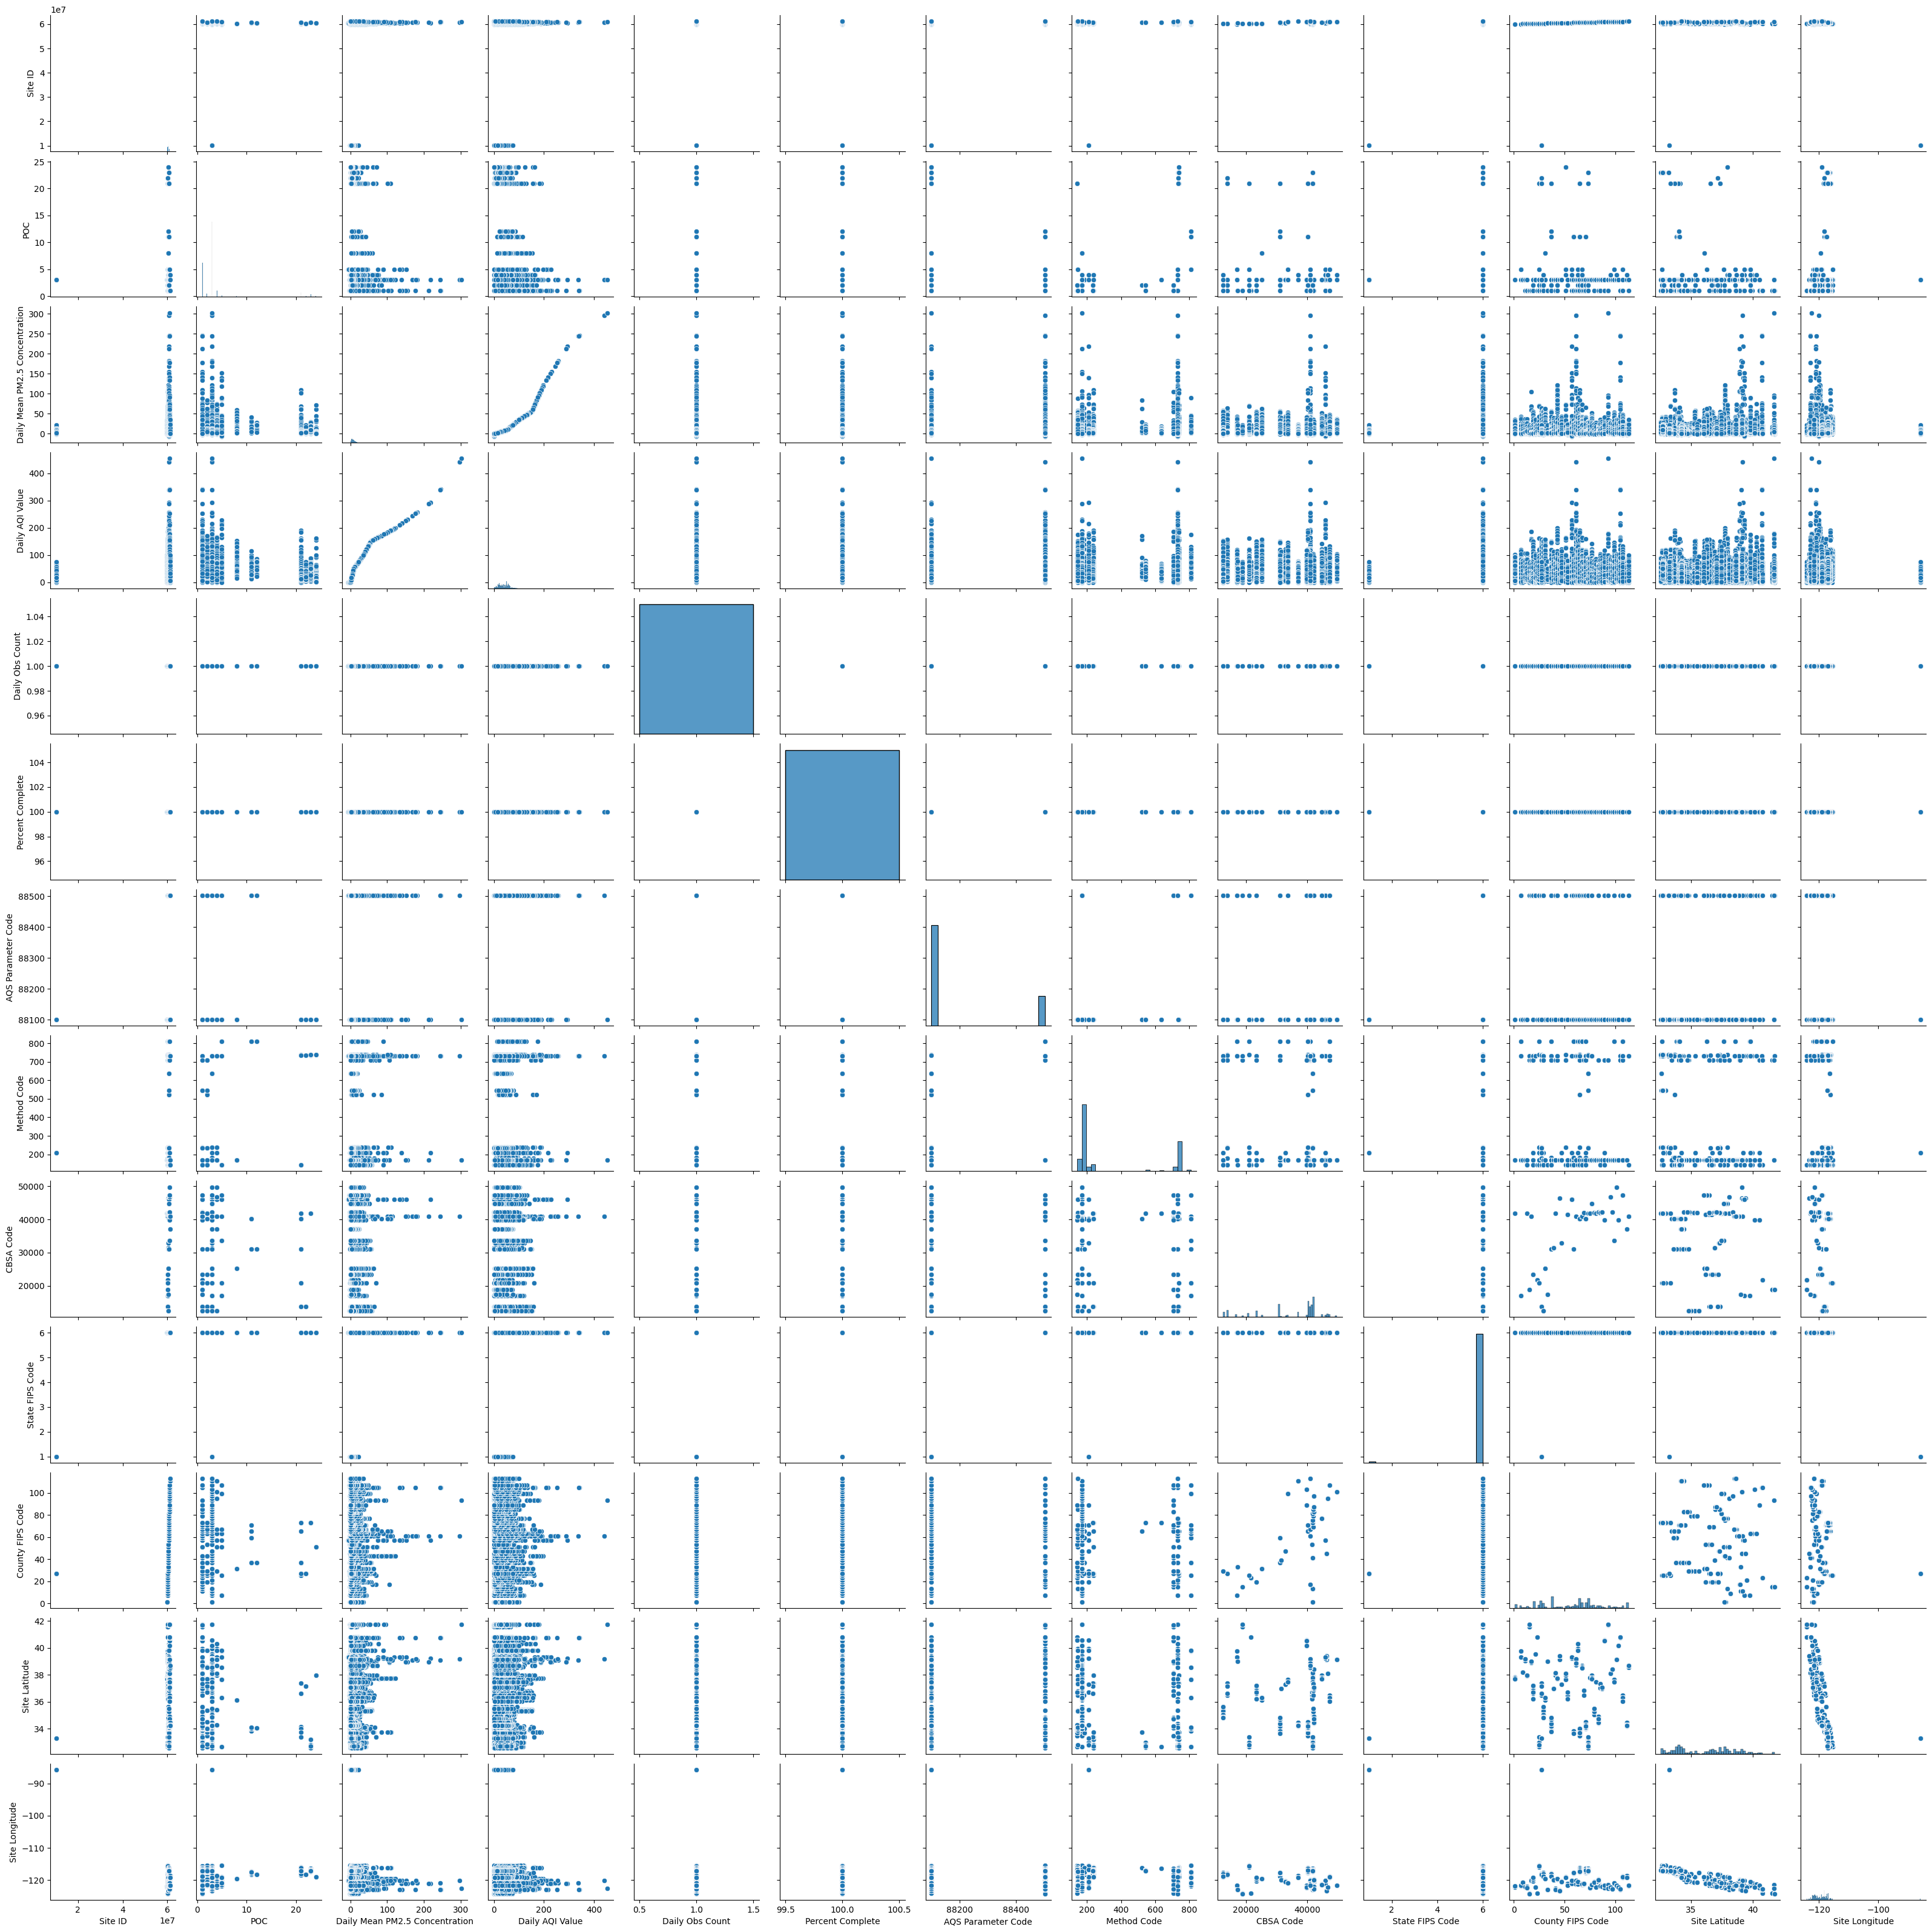

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Usar solo columnas numéricas para evitar errores
df_numerico = df_combinado.select_dtypes(include=['int64', 'float64'])

# Visualización con pairplot
sns.pairplot(df_numerico)

plt.show()